In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 1

In [2]:
df=pd.read_csv('combined_grad_stats_final.csv')

In [3]:
df.drop(columns=['Unnamed: 22','Unnamed: 0'],inplace=True)
df.fillna(0,inplace=True)
df_PP_NP=df[['Course Code','Year','Sem','Total','PP','NP','pp']][(df['PP']!=0) | (df['pp']!=0) | (df['NP']!=0)]
df_PP_NP['PP']=df_PP_NP['PP']+df_PP_NP['pp']
df_PP_NP.drop(columns=['pp'],inplace=True)
df=df[(df['PP']==0) & (df['pp']==0) & (df['NP']==0)]
df.drop(columns=['PP','NP','pp'],inplace=True)
df['Total']=df['Total']-df['II']-df['AU']-df['W']-df['S']-df['DX']
df.drop(columns=['II','AU','W','S','DX'],inplace=True)
df_std=df.copy()

In [4]:
df

,Year,Sem,Course Code,Section,AB,BB,DD,FR,Total,AA,BC,CC,CD,FF,AP,section_tag_div
0,2020,1,AE 152,Total Grades Given for are,1.0,2.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2020,1,AE 153,Total Grades Given for are,2.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,2020,1,AE 153,Total Grades Given for section M are,5.0,6.0,0.0,0.0,17.0,0.0,6.0,0.0,0.0,0.0,0.0,M
3,2020,1,AE 219,Total Grades Given for are,4.0,3.0,0.0,1.0,19.0,11.0,0.0,0.0,0.0,0.0,0.0,0
4,2020,1,AE 223,Total Grades Given for are,17.0,11.0,1.0,4.0,78.0,6.0,21.0,13.0,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7964,2021,2,SC 627,Total Grades Given for section M are,1.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,3.0,0.0,0.0,M
7965,2021,2,SC 644,Total Grades Given for are,1.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0
7966,2021,2,SC 646,Total Grades Given for are,3.0,0.0,1.0,1.0,18.0,12.0,1.0,0.0,0.0,0.0,0.0,0
7967,2021,2,SC 646,Total Grades Given for section M are,4.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,M


In [5]:
df['AB']=9*df['AB']
df['BB']=8*df['BB']
df['DD']=4*df['DD']
df['FR']=0*df['FR']
df['AA']=10*df['AA']
df['BC']=7*df['BC']
df['CC']=6*df['CC']
df['CD']=5*df['CD']
df['FF']=0*df['FF']
df['AP']=10*df['AP']

In [6]:
df2020=df[df['Year']==2020]
df2021=df[df['Year']==2021]
df2022=df[df['Year']==2022]
df2023=df[df['Year']==2023]
df2020_PP_NP=df_PP_NP[df_PP_NP['Year']==2020]
df2021_PP_NP=df_PP_NP[df_PP_NP['Year']==2021]
df2022_PP_NP=df_PP_NP[df_PP_NP['Year']==2022]
df2023_PP_NP=df_PP_NP[df_PP_NP['Year']==2023]
df_std_2020=df_std[df_std['Year']==2020]
df_std_2021=df_std[df_std['Year']==2021]
df_std_2022=df_std[df_std['Year']==2022]
df_std_2023=df_std[df_std['Year']==2023]

In [7]:
df2020.reset_index(inplace=True)
df2021.reset_index(inplace=True)
df2022.reset_index(inplace=True)
df2023.reset_index(inplace=True)
df2020_PP_NP.reset_index(inplace=True)
df2021_PP_NP.reset_index(inplace=True)
df2022_PP_NP.reset_index(inplace=True)
df2023_PP_NP.reset_index(inplace=True)

In [8]:
depts=list(df['Course Code'].str[:2].unique())
df['Course Code'].str[:2].unique()

array(['AE', 'BB', 'CE', 'CH', 'CL', 'CM', 'CS', 'DS', 'EE', 'EN', 'ES',
       'ET', 'GN', 'GP', 'GS', 'HS', 'DE', 'IE', 'MA', 'SI', 'ME', 'IW',
       'MG', 'MN', 'SO', 'MM', 'PH', 'PS', 'SC', 'TD', 'US', 'DH', 'EC',
       'MS', 'LE'], dtype=object)

In [9]:
grpd=pd.DataFrame(columns=[2020,2021,2022,2023],index=depts)
grpd_PP_NP=pd.DataFrame(columns=[2020,2021,2022,2023],index=depts)
std_grpd=pd.DataFrame(columns=[2020,2021,2022,2023],index=depts)

In [10]:
for i in range(len(depts)):
    df_grp=df2020[df2020['Course Code'].str.startswith(depts[i])]
    summed=df_grp.sum(axis=0)
    tot_summed=summed[5]+summed[6]+summed[7]+summed[8]+summed[10]+summed[11]+summed[12]+summed[13]+summed[14]+summed[15]
    grade=tot_summed/summed[9]
    grpd.iloc[i,0]=grade
    
for i in range(len(depts)):
    df_grp=df2021[df2021['Course Code'].str.startswith(depts[i])]
    summed=df_grp.sum(axis=0)
    tot_summed=summed[5]+summed[6]+summed[7]+summed[8]+summed[10]+summed[11]+summed[12]+summed[13]+summed[14]+summed[15]
    grade=tot_summed/summed[9]
    grpd.iloc[i,1]=grade
    
for i in range(len(depts)):
    df_grp=df2022[df2022['Course Code'].str.startswith(depts[i])]
    summed=df_grp.sum(axis=0)
    tot_summed=summed[5]+summed[6]+summed[7]+summed[8]+summed[10]+summed[11]+summed[12]+summed[13]+summed[14]+summed[15]
    grade=tot_summed/summed[9]
    grpd.iloc[i,2]=grade
    
for i in range(len(depts)):
    df_grp=df2023[df2023['Course Code'].str.startswith(depts[i])]
    summed=df_grp.sum(axis=0)
    tot_summed=summed[5]+summed[6]+summed[7]+summed[8]+summed[10]+summed[11]+summed[12]+summed[13]+summed[14]+summed[15]
    grade=tot_summed/summed[9]
    grpd.iloc[i,3]=grade

C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3255572505.py:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  summed=df_grp.sum(axis=0)
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3255572505.py:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  summed=df_grp.sum(axis=0)
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3255572505.py:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' 

C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3255572505.py:10: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  summed=df_grp.sum(axis=0)
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3255572505.py:10: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  summed=df_grp.sum(axis=0)
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3255572505.py:10: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=Non

C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3255572505.py:24: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  summed=df_grp.sum(axis=0)
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3255572505.py:24: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  summed=df_grp.sum(axis=0)
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3255572505.py:24: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=Non

In [11]:
grpd.fillna(0,inplace=True)
grpd

,2020,2021,2022,2023
AE,7.781653,7.516862,6.778385,7.133014
BB,8.324891,8.407434,8.266416,8.245083
CE,7.823022,7.247402,7.201172,7.188561
CH,7.486117,8.083848,7.672521,8.329150
CL,7.079522,6.714618,7.047846,7.133810
CM,8.361582,6.724638,7.731449,7.508571
CS,7.830335,7.656015,7.538777,7.543840
DS,8.824561,8.846626,7.685535,7.102253
EE,7.931821,7.752682,7.492228,7.744218
EN,7.589203,7.765950,7.735855,7.598523


In [12]:
grade20=grpd[[2020]]
grade21=grpd[[2021]]
grade22=grpd[[2022]]
grade23=grpd[[2023]]

In [13]:
for i in range(len(depts)):
    tot=0
    df_req=df_std_2020[df_std_2020['Course Code'].str.startswith(depts[i])]
    df_req=df_req.reset_index()
    df_req.drop(columns=['index'],inplace=True)
    if not np.isnan(df_req.index.max()):
        tot=df_req['AB'].sum()*(9-grpd.iloc[i,0])**2+df_req['BB'].sum()*(8-grpd.iloc[i,0])**2+df_req['DD'].sum()*(4-grpd.iloc[i,0])**2+df_req['FR'].sum()*(0-grpd.iloc[i,0])**2+df_req['AA'].sum()*(10-grpd.iloc[i,0])**2+df_req['BC'].sum()*(7-grpd.iloc[i,0])**2+df_req['CC'].sum()*(6-grpd.iloc[i,0])**2+df_req['CD'].sum()*(5-grpd.iloc[i,0])**2+df_req['FF'].sum()*(0-grpd.iloc[i,0])**2+df_req['AP'].sum()*(10-grpd.iloc[i,0])**2
    else:
        pass
    std=tot/df_req['Total'].sum()
    std_grpd.iloc[i,0]=std**0.5
    
for i in range(len(depts)):
    tot=0
    df_req=df_std_2021[df_std_2021['Course Code'].str.startswith(depts[i])]
    df_req=df_req.reset_index()
    df_req.drop(columns=['index'],inplace=True)
    if not np.isnan(df_req.index.max()):
        tot=df_req['AB'].sum()*(9-grpd.iloc[i,1])**2+df_req['BB'].sum()*(8-grpd.iloc[i,1])**2+df_req['DD'].sum()*(4-grpd.iloc[i,1])**2+df_req['FR'].sum()*(0-grpd.iloc[i,1])**2+df_req['AA'].sum()*(10-grpd.iloc[i,1])**2+df_req['BC'].sum()*(7-grpd.iloc[i,1])**2+df_req['CC'].sum()*(6-grpd.iloc[i,1])**2+df_req['CD'].sum()*(5-grpd.iloc[i,1])**2+df_req['FF'].sum()*(0-grpd.iloc[i,1])**2+df_req['AP'].sum()*(10-grpd.iloc[i,1])**2
    else:
        pass
    std=tot/df_req['Total'].sum()
    std_grpd.iloc[i,1]=std**0.5
    
for i in range(len(depts)):
    tot=0
    df_req=df_std_2022[df_std_2022['Course Code'].str.startswith(depts[i])]
    df_req=df_req.reset_index()
    df_req.drop(columns=['index'],inplace=True)
    if not np.isnan(df_req.index.max()):
        tot=df_req['AB'].sum()*(9-grpd.iloc[i,2])**2+df_req['BB'].sum()*(8-grpd.iloc[i,2])**2+df_req['DD'].sum()*(4-grpd.iloc[i,2])**2+df_req['FR'].sum()*(0-grpd.iloc[i,2])**2+df_req['AA'].sum()*(10-grpd.iloc[i,2])**2+df_req['BC'].sum()*(7-grpd.iloc[i,2])**2+df_req['CC'].sum()*(6-grpd.iloc[i,2])**2+df_req['CD'].sum()*(5-grpd.iloc[i,2])**2+df_req['FF'].sum()*(0-grpd.iloc[i,2])**2+df_req['AP'].sum()*(10-grpd.iloc[i,2])**2
    else:
        pass
    std=tot/df_req['Total'].sum()
    std_grpd.iloc[i,2]=std**0.5
    
for i in range(len(depts)):
    tot=0
    df_req=df_std_2023[df_std_2023['Course Code'].str.startswith(depts[i])]
    df_req=df_req.reset_index()
    df_req.drop(columns=['index'],inplace=True)
    if not np.isnan(df_req.index.max()):
        tot=df_req['AB'].sum()*(9-grpd.iloc[i,3])**2+df_req['BB'].sum()*(8-grpd.iloc[i,3])**2+df_req['DD'].sum()*(4-grpd.iloc[i,3])**2+df_req['FR'].sum()*(0-grpd.iloc[i,3])**2+df_req['AA'].sum()*(10-grpd.iloc[i,3])**2+df_req['BC'].sum()*(7-grpd.iloc[i,3])**2+df_req['CC'].sum()*(6-grpd.iloc[i,3])**2+df_req['CD'].sum()*(5-grpd.iloc[i,3])**2+df_req['FF'].sum()*(0-grpd.iloc[i,3])**2+df_req['AP'].sum()*(10-grpd.iloc[i,3])**2
    else:
        pass
    std=tot/df_req['Total'].sum()
    std_grpd.iloc[i,3]=std**0.5

C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3778474467.py:10: RuntimeWarning: invalid value encountered in scalar divide
  std=tot/df_req['Total'].sum()
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3778474467.py:10: RuntimeWarning: invalid value encountered in scalar divide
  std=tot/df_req['Total'].sum()
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3778474467.py:10: RuntimeWarning: invalid value encountered in scalar divide
  std=tot/df_req['Total'].sum()
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3778474467.py:10: RuntimeWarning: invalid value encountered in scalar divide
  std=tot/df_req['Total'].sum()
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3778474467.py:22: RuntimeWarning: invalid value encountered in scalar divide
  std=tot/df_req['Total'].sum()
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3778474467.py:22: RuntimeWarning: invalid value encountered in scalar divide
  std=tot/df_req['Total'].sum()
C:\U

In [14]:
std_grpd.fillna(0,inplace=True)
std_grpd

,2020,2021,2022,2023
AE,2.039064,2.200362,2.542317,2.473047
BB,1.762823,1.977226,1.825765,1.829038
CE,2.227652,2.626823,2.472005,2.528580
CH,2.074120,1.900561,2.255726,2.054361
CL,2.544651,2.516302,2.414055,2.389969
CM,1.952629,3.189130,2.281892,2.397305
CS,2.228202,2.276045,2.345705,2.235565
DS,1.040796,1.471958,1.656466,1.847274
EE,2.204911,2.112284,2.073562,2.099754
EN,2.399954,2.417359,2.298934,2.219102


In [15]:
std_grade20=std_grpd[[2020]]
std_grade21=std_grpd[[2021]]
std_grade22=std_grpd[[2022]]
std_grade23=std_grpd[[2023]]

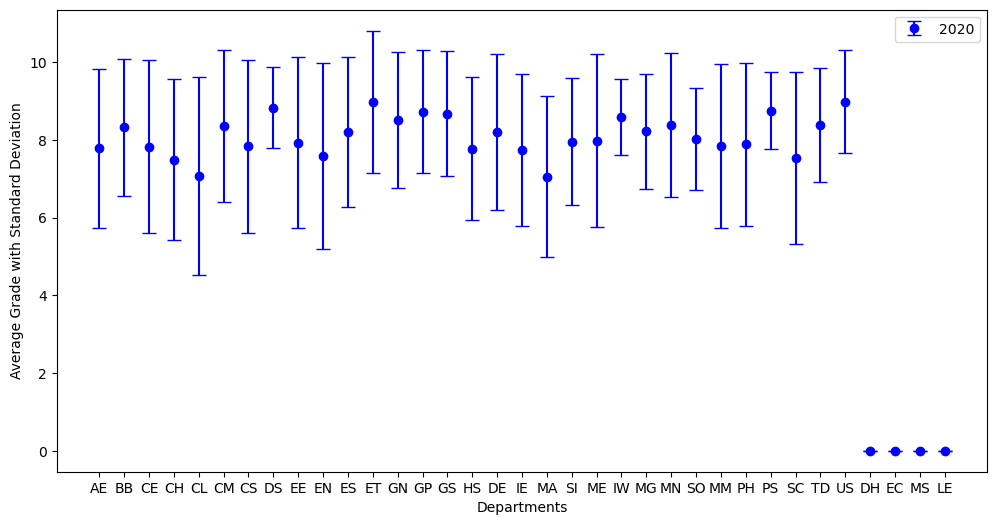

In [16]:
plt.figure(figsize=(12,6))
plt.errorbar(grade20.index,grade20.values.flatten(), yerr=std_grade20.values.flatten(),fmt='o', color='blue', ecolor='blue', capsize=5, label='2020')
plt.xlabel('Departments')
plt.ylabel('Average Grade with Standard Deviation')
plt.legend()
plt.show()

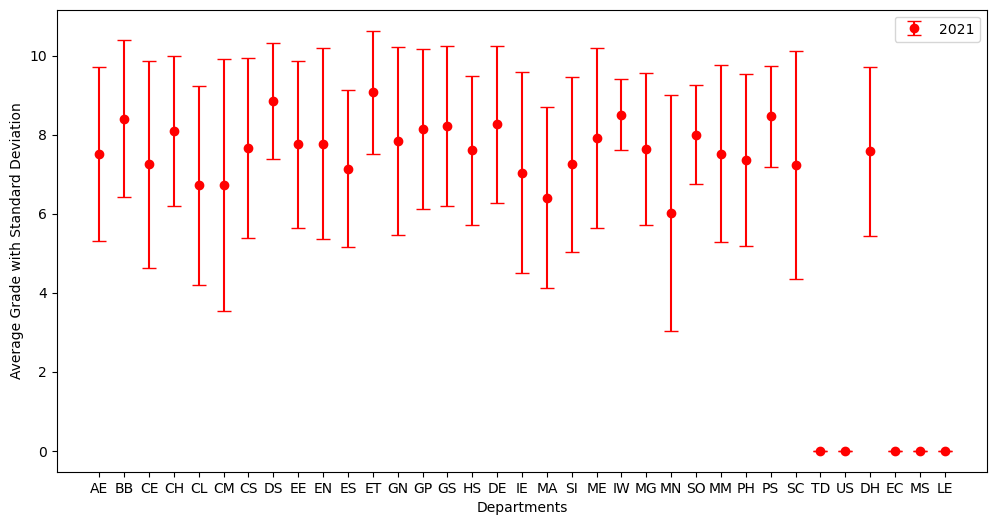

In [17]:
plt.figure(figsize=(12,6))
plt.errorbar(grade21.index,grade21.values.flatten(), yerr=std_grade21.values.flatten(),fmt='o', color='red', ecolor='red', capsize=5, label='2021')
plt.xlabel('Departments')
plt.ylabel('Average Grade with Standard Deviation')
plt.legend()
plt.show()

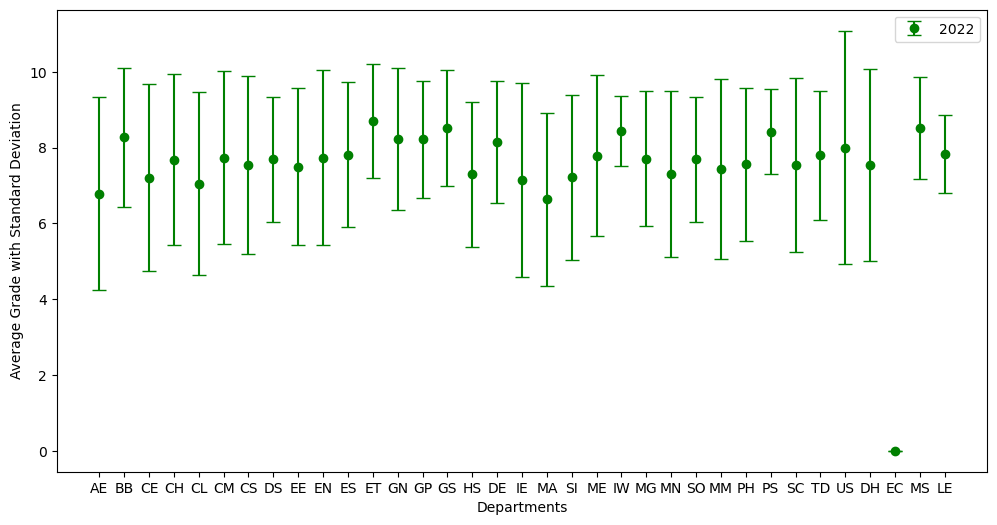

In [18]:
plt.figure(figsize=(12,6))
plt.errorbar(grade22.index,grade22.values.flatten(), yerr=std_grade22.values.flatten(),fmt='o', color='green', ecolor='green', capsize=5, label='2022')
plt.xlabel('Departments')
plt.ylabel('Average Grade with Standard Deviation')
plt.legend()
plt.show()

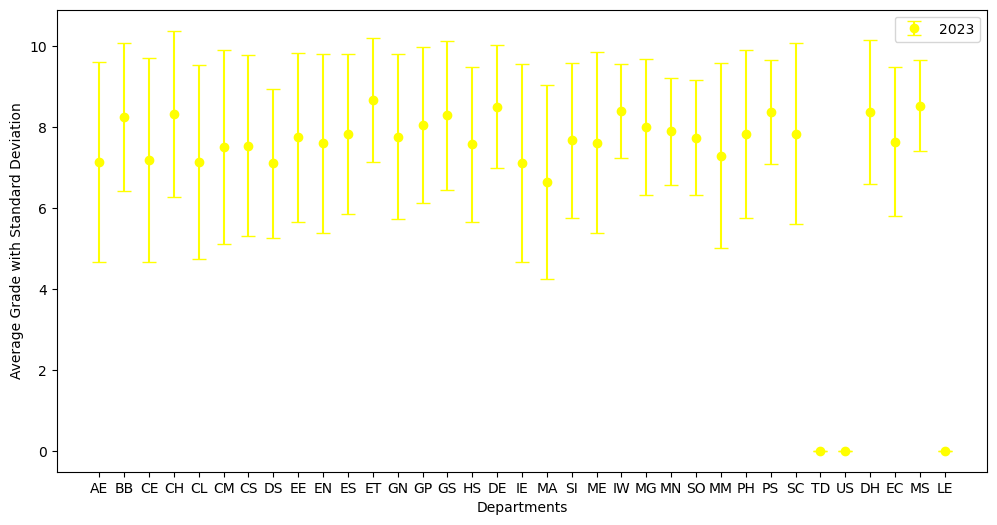

In [19]:
plt.figure(figsize=(12,6))
plt.errorbar(grade23.index,grade23.values.flatten(), yerr=std_grade23.values.flatten(),fmt='o', color='yellow', ecolor='yellow', capsize=5, label='2023')
plt.xlabel('Departments')
plt.ylabel('Average Grade with Standard Deviation')
plt.legend()
plt.show()

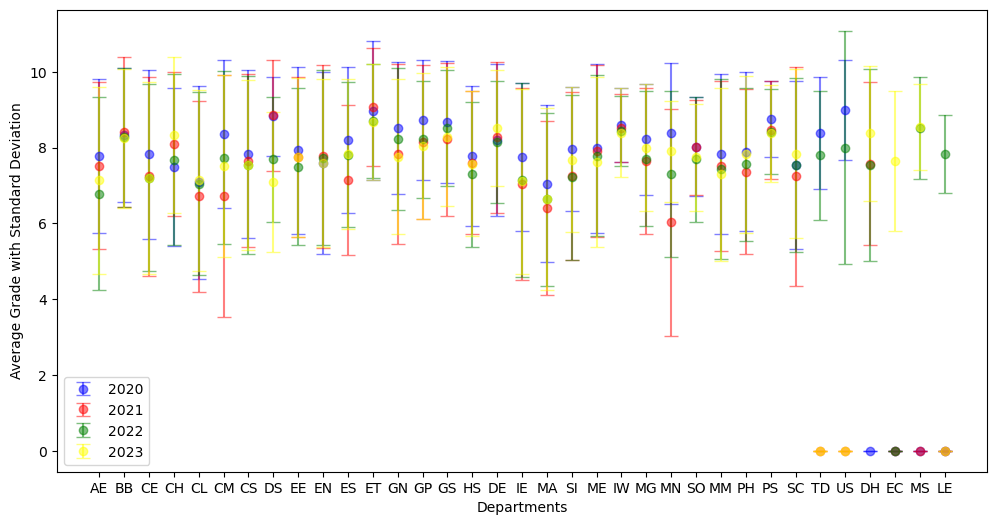

In [20]:
plt.figure(figsize=(12,6))
plt.errorbar(grade20.index,grade20.values.flatten(), yerr=std_grade20.values.flatten(),fmt='o', color='blue', ecolor='blue',alpha=0.5, capsize=5, label='2020')
plt.errorbar(grade21.index,grade21.values.flatten(), yerr=std_grade21.values.flatten(),fmt='o', color='red', ecolor='red',alpha=0.5, capsize=5, label='2021')
plt.errorbar(grade22.index,grade22.values.flatten(), yerr=std_grade22.values.flatten(),fmt='o', color='green', ecolor='green',alpha=0.5, capsize=5, label='2022')
plt.errorbar(grade23.index,grade23.values.flatten(), yerr=std_grade23.values.flatten(),fmt='o', color='yellow', ecolor='yellow',alpha=0.5, capsize=5, label='2023')
plt.xlabel('Departments')
plt.ylabel('Average Grade with Standard Deviation')
plt.legend()
plt.show()

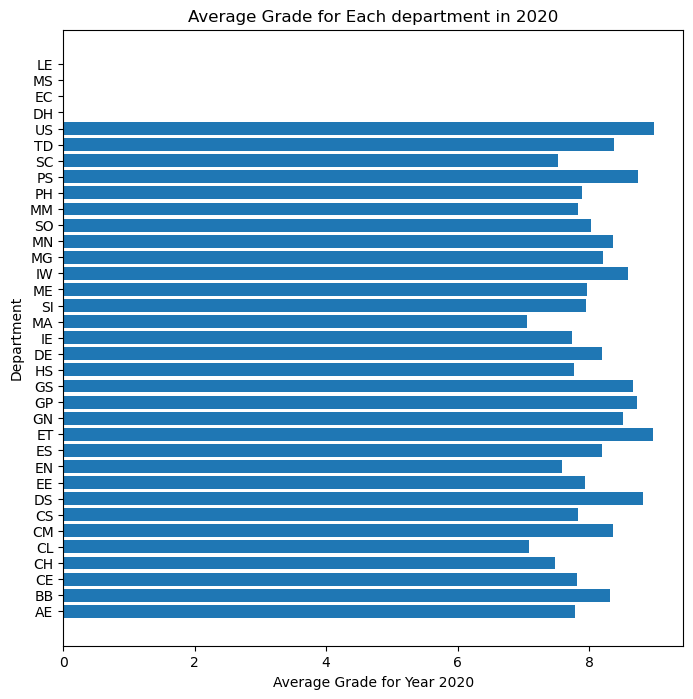

In [21]:
plt.figure(figsize=(8,8))
plt.barh(list(grade20.index),list(grade20.values.reshape(1,-1)[0]))
plt.xlabel('Average Grade for Year 2020')
plt.ylabel('Department')
plt.title('Average Grade for Each department in 2020')
plt.show()

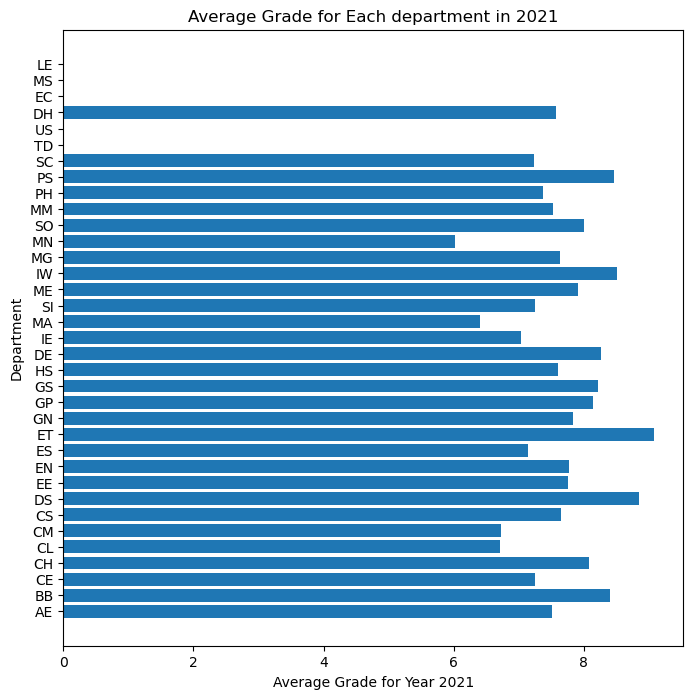

In [22]:
plt.figure(figsize=(8,8))
plt.barh(list(grade21.index),list(grade21.values.reshape(1,-1)[0]))
plt.xlabel('Average Grade for Year 2021')
plt.ylabel('Department')
plt.title('Average Grade for Each department in 2021')
plt.show()

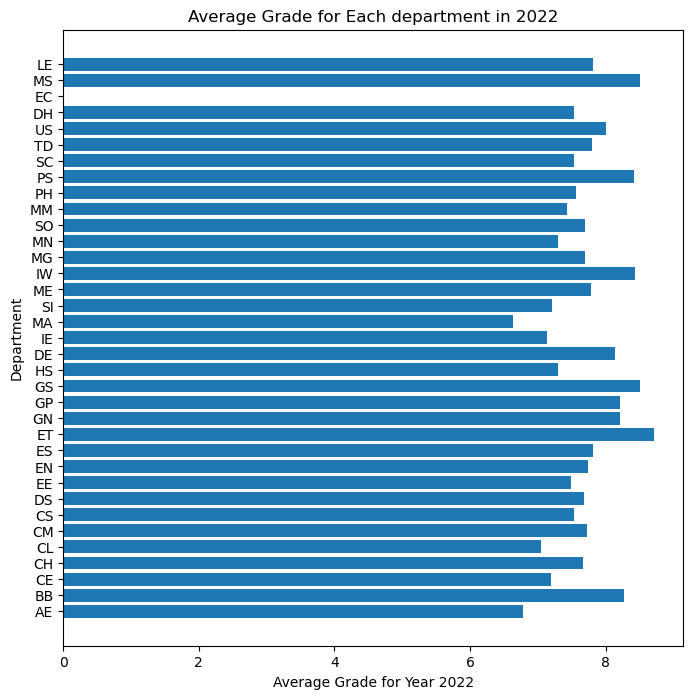

In [23]:
plt.figure(figsize=(8,8))
plt.barh(list(grade22.index),list(grade22.values.reshape(1,-1)[0]))
plt.xlabel('Average Grade for Year 2022')
plt.ylabel('Department')
plt.title('Average Grade for Each department in 2022')
plt.show()

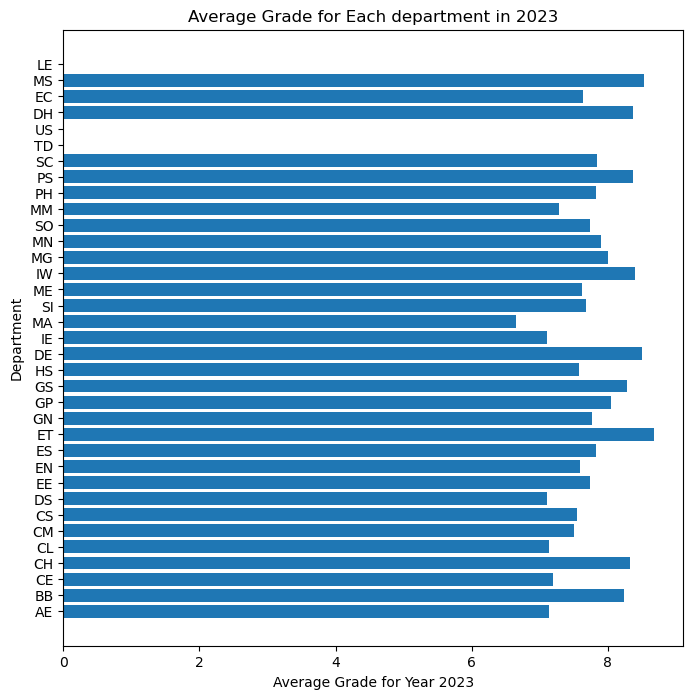

In [24]:
plt.figure(figsize=(8,8))
plt.barh(list(grade23.index),list(grade23.values.reshape(1,-1)[0]))
plt.xlabel('Average Grade for Year 2023')
plt.ylabel('Department')
plt.title('Average Grade for Each department in 2023')
plt.show()

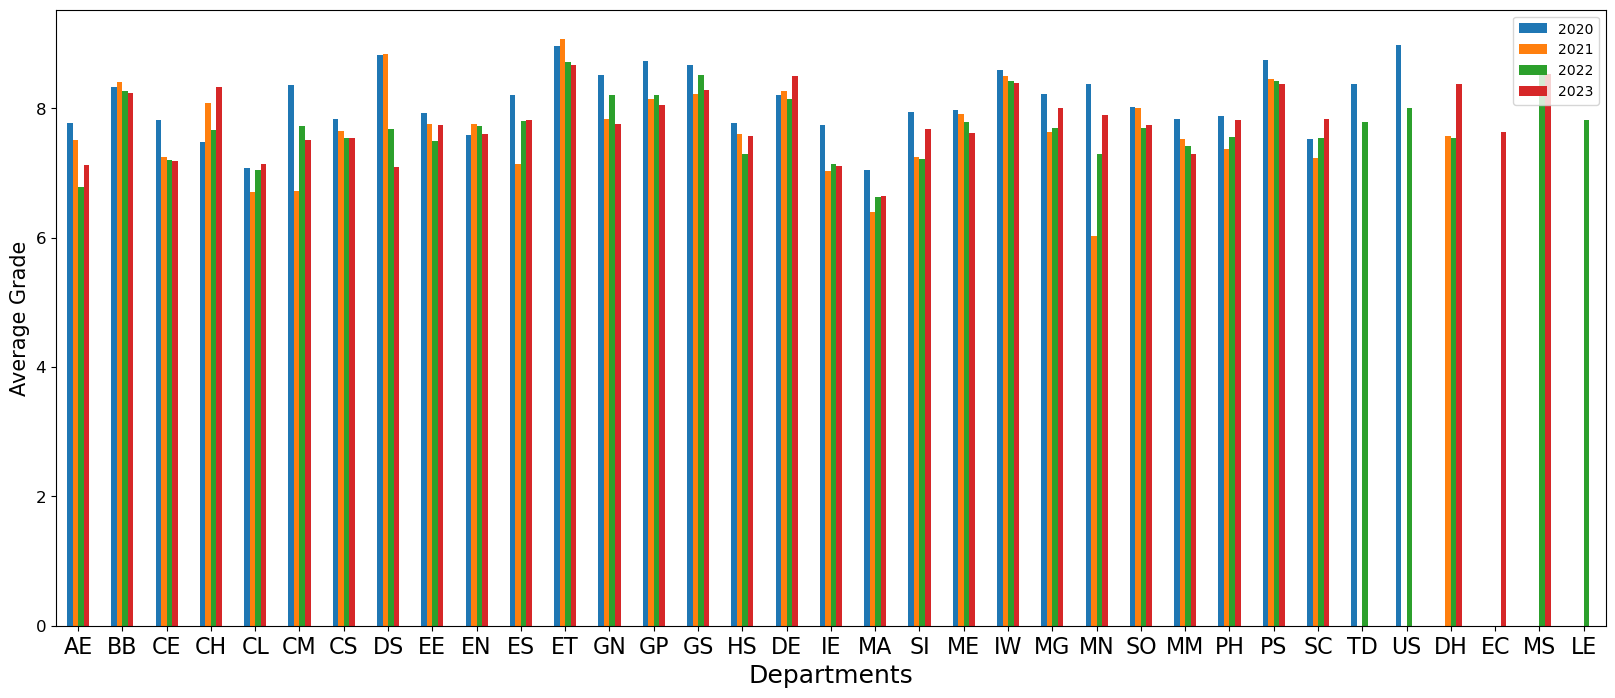

In [25]:
grpd.plot(kind='bar',figsize=(20,8))
plt.xlabel('Departments',fontsize=18)
plt.ylabel('Average Grade',fontsize=15)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(fontsize=12)
plt.show()

# Task 2

In [26]:
df=pd.read_csv('combined_grad_stats_final.csv')

In [27]:
df.drop(columns=['Unnamed: 22','Unnamed: 0'],inplace=True)
df.fillna(0,inplace=True)
df_PP_NP=df[['Course Code','Year','Sem','Total','PP','NP','pp']][(df['PP']!=0) | (df['pp']!=0) | (df['NP']!=0)]
df_PP_NP['PP']=df_PP_NP['PP']+df_PP_NP['pp']
df_PP_NP.drop(columns=['pp'],inplace=True)
df=df[(df['PP']==0) & (df['pp']==0) & (df['NP']==0)]
df.drop(columns=['PP','NP','pp'],inplace=True)
df['Total']=df['Total']-df['II']-df['AU']-df['W']-df['S']-df['DX']
df.drop(columns=['II','AU','W','S','DX'],inplace=True)
df_std=df.copy()

In [28]:
df['AB']=9*df['AB']
df['BB']=8*df['BB']
df['DD']=4*df['DD']
df['FR']=0*df['FR']
df['AA']=10*df['AA']
df['BC']=7*df['BC']
df['CC']=6*df['CC']
df['CD']=5*df['CD']
df['FF']=0*df['FF']
df['AP']=10*df['AP']

In [29]:
bins=[-1,100,200,300,400,500,600,700,800]
bins_labels=['0-100', '100-200', '200-300', '300-400', '400-500','500-600','600-700','700-800']

In [30]:
df['Bins'] = pd.cut(df['Total'], bins=bins, labels=['0-100', '100-200', '200-300', '300-400', '400-500','500-600','600-700','700-800'])
df_std['Bins'] = pd.cut(df_std['Total'], bins=bins, labels=['0-100', '100-200', '200-300', '300-400', '400-500','500-600','600-700','700-800'])

In [31]:
df2020=df[df['Year']==2020]
df2021=df[df['Year']==2021]
df2022=df[df['Year']==2022]
df2023=df[df['Year']==2023]
df2020_PP_NP=df_PP_NP[df_PP_NP['Year']==2020]
df2021_PP_NP=df_PP_NP[df_PP_NP['Year']==2021]
df2022_PP_NP=df_PP_NP[df_PP_NP['Year']==2022]
df2023_PP_NP=df_PP_NP[df_PP_NP['Year']==2023]
df2020_grad_reg=df_std[df_std['Year']==2020]
df2021_grad_reg=df_std[df_std['Year']==2021]
df2022_grad_reg=df_std[df_std['Year']==2022]
df2023_grad_reg=df_std[df_std['Year']==2023]

In [32]:
reg_grads=pd.DataFrame(columns=[2020,2021,2022,2023],index=['0-100', '100-200', '200-300', '300-400', '400-500','500-600','600-700','700-800'])
std_reg_grads=pd.DataFrame(columns=[2020,2021,2022,2023],index=['0-100', '100-200', '200-300', '300-400', '400-500','500-600','600-700','700-800'])

In [33]:
for i in range(8):
    df_grouped=df2020.groupby(df['Bins']).sum()
    tot=df_grouped.iloc[i,2]+df_grouped.iloc[i,3]+df_grouped.iloc[i,4]+df_grouped.iloc[i,5]+df_grouped.iloc[i,7]+df_grouped.iloc[i,8]+df_grouped.iloc[i,9]+df_grouped.iloc[i,10]+df_grouped.iloc[i,11]+df_grouped.iloc[i,12]
    grade=tot/df_grouped.iloc[i,6]
    reg_grads.iloc[i,0]=grade
    
for i in range(8):
    df_grouped=df2021.groupby(df['Bins']).sum()
    tot=df_grouped.iloc[i,2]+df_grouped.iloc[i,3]+df_grouped.iloc[i,4]+df_grouped.iloc[i,5]+df_grouped.iloc[i,7]+df_grouped.iloc[i,8]+df_grouped.iloc[i,9]+df_grouped.iloc[i,10]+df_grouped.iloc[i,11]+df_grouped.iloc[i,12]
    grade=tot/df_grouped.iloc[i,6]
    reg_grads.iloc[i,1]=grade
    
for i in range(8):
    df_grouped=df2022.groupby(df['Bins']).sum()
    tot=df_grouped.iloc[i,2]+df_grouped.iloc[i,3]+df_grouped.iloc[i,4]+df_grouped.iloc[i,5]+df_grouped.iloc[i,7]+df_grouped.iloc[i,8]+df_grouped.iloc[i,9]+df_grouped.iloc[i,10]+df_grouped.iloc[i,11]+df_grouped.iloc[i,12]
    grade=tot/df_grouped.iloc[i,6]
    reg_grads.iloc[i,2]=grade
    
for i in range(8):
    df_grouped=df2023.groupby(df['Bins']).sum()
    tot=df_grouped.iloc[i,2]+df_grouped.iloc[i,3]+df_grouped.iloc[i,4]+df_grouped.iloc[i,5]+df_grouped.iloc[i,7]+df_grouped.iloc[i,8]+df_grouped.iloc[i,9]+df_grouped.iloc[i,10]+df_grouped.iloc[i,11]+df_grouped.iloc[i,12]
    grade=tot/df_grouped.iloc[i,6]
    reg_grads.iloc[i,3]=grade

C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\2976487144.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped=df2020.groupby(df['Bins']).sum()
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\2976487144.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped=df2020.groupby(df['Bins']).sum()
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\2976487144.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be va

In [34]:
reg_grads.fillna(0,inplace=True)

In [35]:
for i in range(8):
    tot=0
    df_stds_req=df2020_grad_reg[df2020_grad_reg['Bins']==bins_labels[i]]
    df_stds_req=df_stds_req.reset_index()
    df_stds_req.drop(columns=['index'],inplace=True)
    if not np.isnan(df_stds_req.index.max()):
        tot=df_stds_req['AB'].sum()*(9-grpd.iloc[i,0])**2+df_stds_req['BB'].sum()*(8-grpd.iloc[i,0])**2+df_stds_req['DD'].sum()*(4-grpd.iloc[i,0])**2+df_stds_req['FR'].sum()*(0-grpd.iloc[i,0])**2+df_stds_req['AA'].sum()*(10-grpd.iloc[i,0])**2+df_stds_req['BC'].sum()*(7-grpd.iloc[i,0])**2+df_stds_req['CC'].sum()*(6-grpd.iloc[i,0])**2+df_stds_req['CD'].sum()*(5-grpd.iloc[i,0])**2+df_stds_req['FF'].sum()*(0-grpd.iloc[i,0])**2+df_stds_req['AP'].sum()*(10-grpd.iloc[i,0])**2
    else:
        pass
    std=tot/df_stds_req['Total'].sum()
    std_reg_grads.iloc[i,0]=std**0.5
    
for i in range(8):
    tot=0
    df_stds_req=df2021_grad_reg[df2021_grad_reg['Bins']==bins_labels[i]]
    df_stds_req=df_stds_req.reset_index()
    df_stds_req.drop(columns=['index'],inplace=True)
    if not np.isnan(df_stds_req.index.max()):
        tot=df_stds_req['AB'].sum()*(9-grpd.iloc[i,1])**2+df_stds_req['BB'].sum()*(8-grpd.iloc[i,1])**2+df_stds_req['DD'].sum()*(4-grpd.iloc[i,1])**2+df_stds_req['FR'].sum()*(0-grpd.iloc[i,1])**2+df_stds_req['AA'].sum()*(10-grpd.iloc[i,1])**2+df_stds_req['BC'].sum()*(7-grpd.iloc[i,1])**2+df_stds_req['CC'].sum()*(6-grpd.iloc[i,1])**2+df_stds_req['CD'].sum()*(5-grpd.iloc[i,1])**2+df_stds_req['FF'].sum()*(0-grpd.iloc[i,1])**2+df_stds_req['AP'].sum()*(10-grpd.iloc[i,1])**2
    else:
        pass
    std=tot/df_stds_req['Total'].sum()
    std_reg_grads.iloc[i,1]=std**0.5
    
for i in range(8):
    tot=0
    df_stds_req=df2022_grad_reg[df2022_grad_reg['Bins']==bins_labels[i]]
    df_stds_req=df_stds_req.reset_index()
    df_stds_req.drop(columns=['index'],inplace=True)
    if not np.isnan(df_stds_req.index.max()):
        tot=df_stds_req['AB'].sum()*(9-grpd.iloc[i,2])**2+df_stds_req['BB'].sum()*(8-grpd.iloc[i,2])**2+df_stds_req['DD'].sum()*(4-grpd.iloc[i,2])**2+df_stds_req['FR'].sum()*(0-grpd.iloc[i,2])**2+df_stds_req['AA'].sum()*(10-grpd.iloc[i,2])**2+df_stds_req['BC'].sum()*(7-grpd.iloc[i,2])**2+df_stds_req['CC'].sum()*(6-grpd.iloc[i,2])**2+df_stds_req['CD'].sum()*(5-grpd.iloc[i,2])**2+df_stds_req['FF'].sum()*(0-grpd.iloc[i,2])**2+df_stds_req['AP'].sum()*(10-grpd.iloc[i,2])**2
    else:
        pass
    std=tot/df_stds_req['Total'].sum()
    std_reg_grads.iloc[i,2]=std**0.5
    
for i in range(8):
    tot=0
    df_stds_req=df2023_grad_reg[df2023_grad_reg['Bins']==bins_labels[i]]
    df_stds_req=df_stds_req.reset_index()
    df_stds_req.drop(columns=['index'],inplace=True)
    if not np.isnan(df_stds_req.index.max()):
        tot=df_stds_req['AB'].sum()*(9-grpd.iloc[i,3])**2+df_stds_req['BB'].sum()*(8-grpd.iloc[i,3])**2+df_stds_req['DD'].sum()*(4-grpd.iloc[i,3])**2+df_stds_req['FR'].sum()*(0-grpd.iloc[i,3])**2+df_stds_req['AA'].sum()*(10-grpd.iloc[i,3])**2+df_stds_req['BC'].sum()*(7-grpd.iloc[i,3])**2+df_stds_req['CC'].sum()*(6-grpd.iloc[i,3])**2+df_stds_req['CD'].sum()*(5-grpd.iloc[i,3])**2+df_stds_req['FF'].sum()*(0-grpd.iloc[i,3])**2+df_stds_req['AP'].sum()*(10-grpd.iloc[i,3])**2
    else:
        pass
    std=tot/df_stds_req['Total'].sum()
    std_reg_grads.iloc[i,3]=std**0.5

C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3452372844.py:10: RuntimeWarning: invalid value encountered in scalar divide
  std=tot/df_stds_req['Total'].sum()
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3452372844.py:10: RuntimeWarning: invalid value encountered in scalar divide
  std=tot/df_stds_req['Total'].sum()
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3452372844.py:10: RuntimeWarning: invalid value encountered in scalar divide
  std=tot/df_stds_req['Total'].sum()
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3452372844.py:10: RuntimeWarning: invalid value encountered in scalar divide
  std=tot/df_stds_req['Total'].sum()
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3452372844.py:22: RuntimeWarning: invalid value encountered in scalar divide
  std=tot/df_stds_req['Total'].sum()
C:\Users\Aditya Gupta\AppData\Local\Temp\ipykernel_14744\3452372844.py:22: RuntimeWarning: invalid value encountered in scalar divide
  std=tot/d

In [36]:
std_reg_grads.fillna(0,inplace=True)

In [37]:
std_reg_grads20=std_reg_grads[[2020]]
std_reg_grads21=std_reg_grads[[2021]]
std_reg_grads22=std_reg_grads[[2022]]
std_reg_grads23=std_reg_grads[[2023]]
reg_grads20=reg_grads[[2020]]
reg_grads21=reg_grads[[2021]]
reg_grads22=reg_grads[[2022]]
reg_grads23=reg_grads[[2023]]

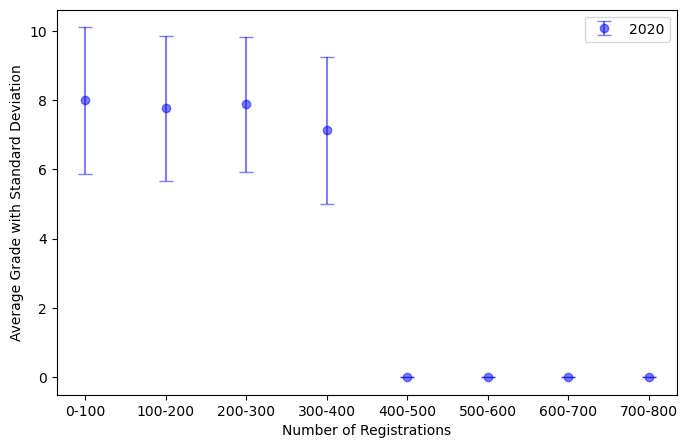

In [38]:
plt.figure(figsize=(8,5))
plt.errorbar(reg_grads20.index,reg_grads20.values.flatten(), yerr=std_reg_grads20.values.flatten(),fmt='o', color='blue', ecolor='blue',alpha=0.5, capsize=5, label='2020')
plt.ylabel('Average Grade with Standard Deviation')
plt.xlabel('Number of Registrations')
plt.legend()
plt.show()

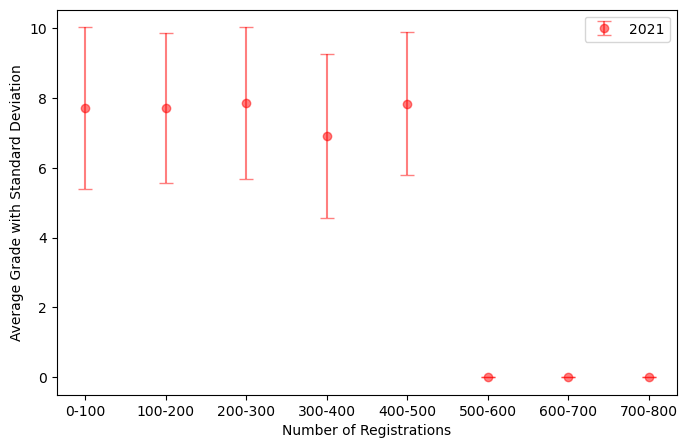

In [39]:
plt.figure(figsize=(8,5))
plt.errorbar(reg_grads21.index,reg_grads21.values.flatten(), yerr=std_reg_grads21.values.flatten(),fmt='o', color='red', ecolor='red',alpha=0.5, capsize=5, label='2021')
plt.ylabel('Average Grade with Standard Deviation')
plt.xlabel('Number of Registrations')
plt.legend()
plt.show()

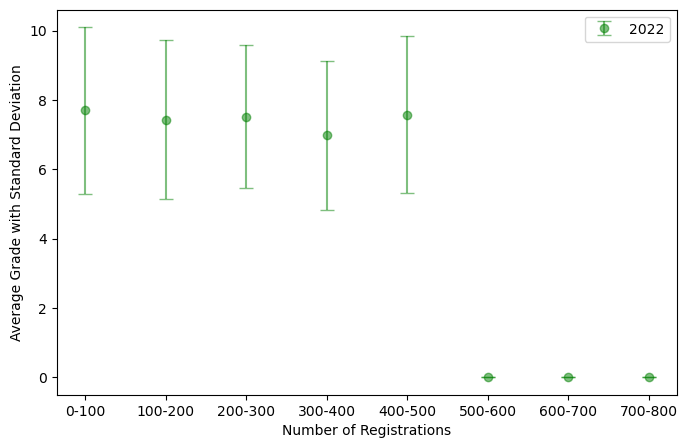

In [40]:
plt.figure(figsize=(8,5))
plt.errorbar(reg_grads22.index,reg_grads22.values.flatten(), yerr=std_reg_grads22.values.flatten(),fmt='o', color='green', ecolor='green',alpha=0.5, capsize=5, label='2022')
plt.ylabel('Average Grade with Standard Deviation')
plt.xlabel('Number of Registrations')
plt.legend()
plt.show()

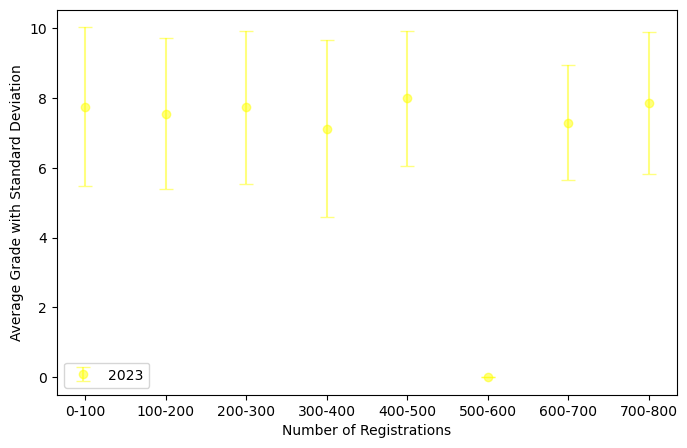

In [41]:
plt.figure(figsize=(8,5))
plt.errorbar(reg_grads23.index,reg_grads23.values.flatten(), yerr=std_reg_grads23.values.flatten(),fmt='o', color='yellow', ecolor='yellow',alpha=0.5, capsize=5, label='2023')
plt.ylabel('Average Grade with Standard Deviation')
plt.xlabel('Number of Registrations')
plt.legend()
plt.show()

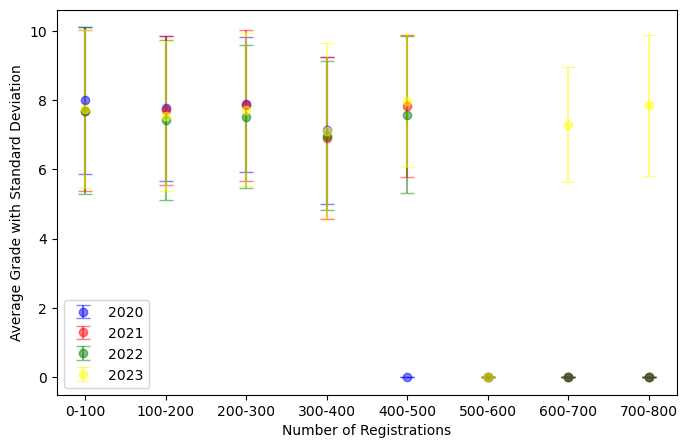

In [42]:
plt.figure(figsize=(8,5))
plt.errorbar(reg_grads20.index,reg_grads20.values.flatten(), yerr=std_reg_grads20.values.flatten(),fmt='o', color='blue', ecolor='blue',alpha=0.5, capsize=5, label='2020')
plt.errorbar(reg_grads21.index,reg_grads21.values.flatten(), yerr=std_reg_grads21.values.flatten(),fmt='o', color='red', ecolor='red',alpha=0.5, capsize=5, label='2021')
plt.errorbar(reg_grads22.index,reg_grads22.values.flatten(), yerr=std_reg_grads22.values.flatten(),fmt='o', color='green', ecolor='green',alpha=0.5, capsize=5, label='2022')
plt.errorbar(reg_grads23.index,reg_grads23.values.flatten(), yerr=std_reg_grads23.values.flatten(),fmt='o', color='yellow', ecolor='yellow',alpha=0.5, capsize=5, label='2023')
plt.ylabel('Average Grade with Standard Deviation')
plt.xlabel('Number of Registrations')
plt.legend()
plt.show()

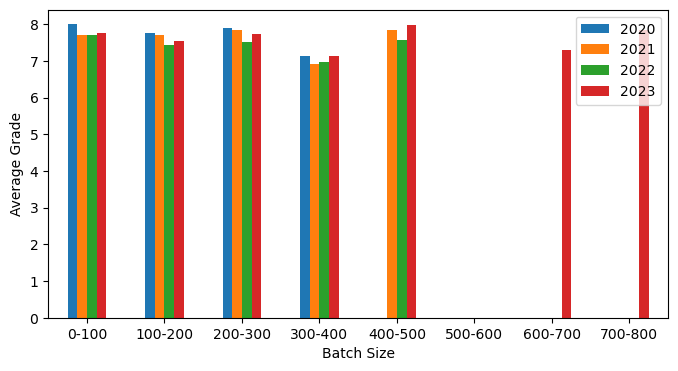

In [43]:
reg_grads.plot(figsize=(8,4),kind='bar')
plt.xlabel('Batch Size')
plt.ylabel('Average Grade')
plt.xticks(rotation=0)
plt.show()

In [44]:
std_reg_grads

,2020,2021,2022,2023
0-100,2.113326,2.319242,2.401903,2.279199
100-200,2.087870,2.147501,2.305827,2.158704
200-300,1.956636,2.175949,2.061726,2.199914
300-400,2.116615,2.340457,2.146722,2.534787
400-500,0.000000,2.055346,2.264002,1.930458
500-600,0.000000,0.000000,0.000000,0.000000
600-700,0.000000,0.000000,0.000000,1.652765
700-800,0.000000,0.000000,0.000000,2.031970


In [45]:
reg_grads

,2020,2021,2022,2023
0-100,7.994166,7.702418,7.698064,7.748455
100-200,7.761933,7.704910,7.434435,7.547314
200-300,7.882320,7.848458,7.520983,7.730475
300-400,7.126845,6.908110,6.978398,7.121922
400-500,0.000000,7.838417,7.581297,7.986948
500-600,0.000000,0.000000,0.000000,0.000000
600-700,0.000000,0.000000,0.000000,7.295508
700-800,0.000000,0.000000,0.000000,7.847826


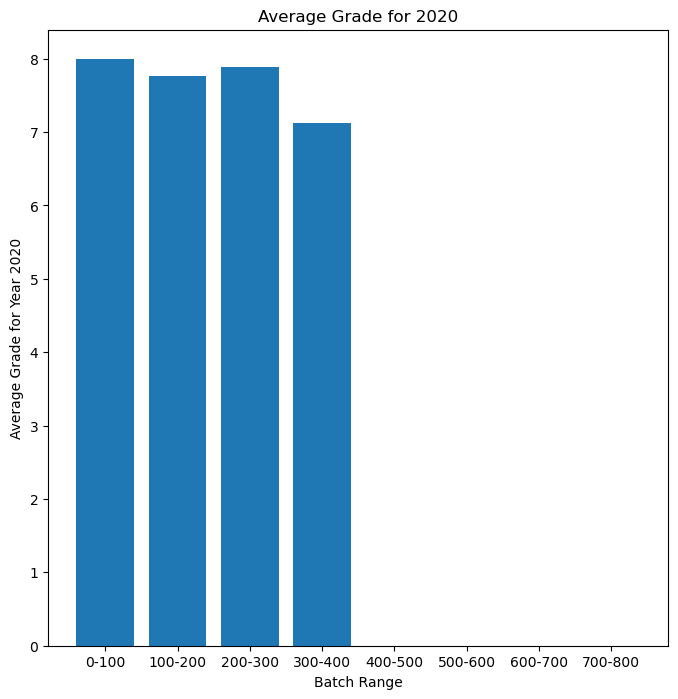

In [46]:
plt.figure(figsize=(8,8))
plt.bar(list(reg_grads20.index),list(reg_grads20.values.reshape(1,-1)[0]))
plt.ylabel('Average Grade for Year 2020')
plt.xlabel('Batch Range')
plt.title('Average Grade for 2020')
plt.show()

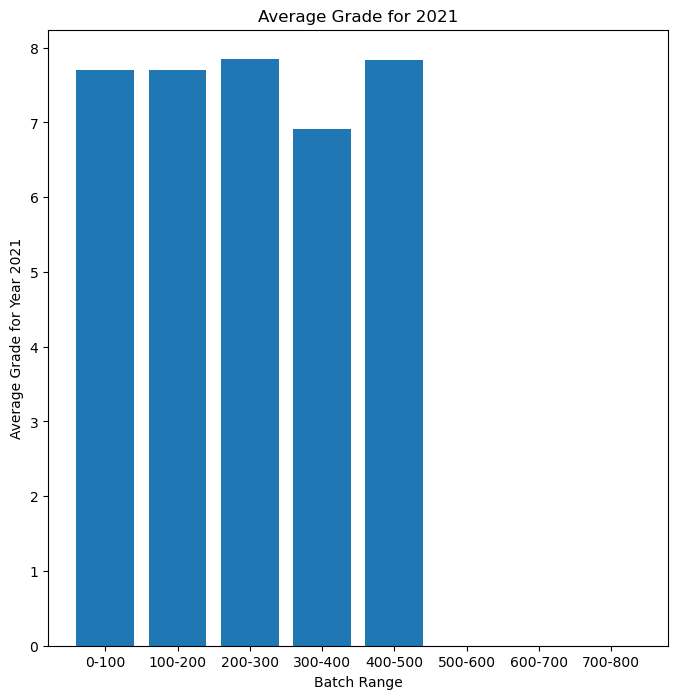

In [47]:
plt.figure(figsize=(8,8))
plt.bar(list(reg_grads21.index),list(reg_grads21.values.reshape(1,-1)[0]))
plt.ylabel('Average Grade for Year 2021')
plt.xlabel('Batch Range')
plt.title('Average Grade for 2021')
plt.show()

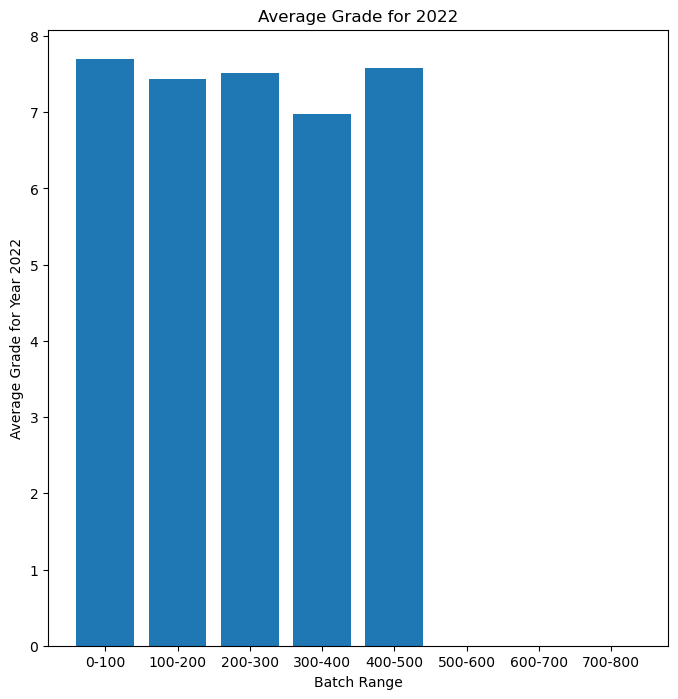

In [48]:
plt.figure(figsize=(8,8))
plt.bar(list(reg_grads22.index),list(reg_grads22.values.reshape(1,-1)[0]))
plt.ylabel('Average Grade for Year 2022')
plt.xlabel('Batch Range')
plt.title('Average Grade for 2022')
plt.show()

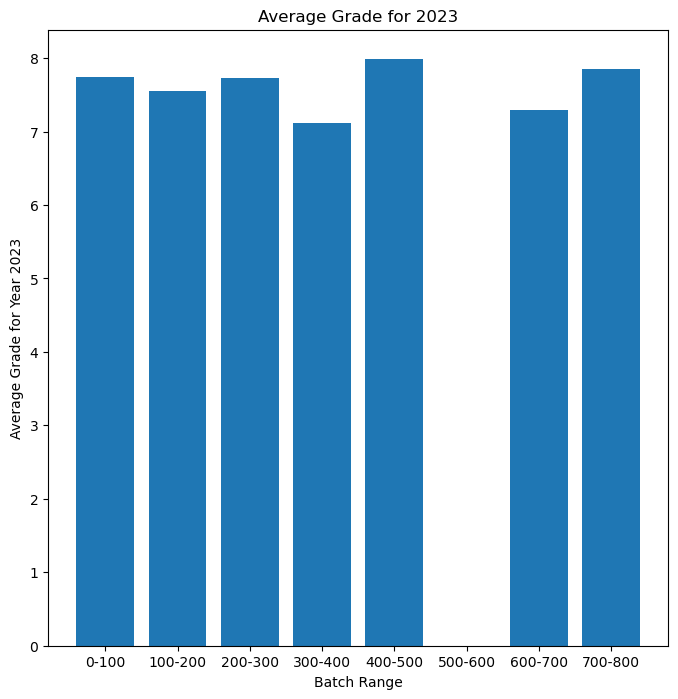

In [49]:
plt.figure(figsize=(8,8))
plt.bar(list(reg_grads23.index),list(reg_grads23.values.reshape(1,-1)[0]))
plt.ylabel('Average Grade for Year 2023')
plt.xlabel('Batch Range')
plt.title('Average Grade for 2023')
plt.show()